Here we discuss methods of features selection in ML problems.

In [1]:
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

We will deal with data from Kaggle Home Credit Default Risk competition in which we need to predict whether some person is able to pay its credit to the bank.

In [2]:
application_train = pd.read_csv('application_train.csv')
application_train.shape

(307511, 122)

In [3]:
application_train.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
240605,378636,0,Cash loans,M,N,Y,0,315000.0,472500.0,46161.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
270078,413004,0,Cash loans,F,N,Y,0,382500.0,1125000.0,32895.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
141854,264479,0,Cash loans,F,N,Y,0,292500.0,686749.5,24795.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0
244077,382527,0,Cash loans,F,Y,Y,0,675000.0,1971072.0,68643.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
166903,293488,0,Cash loans,F,Y,Y,0,90000.0,271066.5,12069.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
application_train.TARGET.value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

For convenience let's consider only 10% of data

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
application, _ = train_test_split(application_train,
                                  train_size=0.1,
                                  random_state=27,
                                  stratify=application_train.TARGET #Для сохранения баланса классов
                                  )
application = application.sort_values('SK_ID_CURR').reset_index(drop=True)
application.TARGET.value_counts()

TARGET
0    28269
1     2482
Name: count, dtype: int64

In [7]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
2,100016,0,Cash loans,F,N,Y,0,67500.0,80865.0,5881.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
3,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
4,100036,0,Cash loans,F,N,Y,0,112500.0,512064.0,25033.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,5.0


application_train довольно большая таблица, дальше она нам не нужна, можно ее удалить и собрать мусор

application train is quite big table, we no need it in further, so we can delete it and collect the garbage.

In [8]:
del application_train
gc.collect(); # Collecting the garbage

Highlighte numerical and non-numerical features:

In [9]:
categorical_list = []
numerical_list = []
for i in application.columns.tolist():
    if application[i].dtype=='object':
        categorical_list.append(i)
    else:
        numerical_list.append(i)
print('Number of categorical features:', len(categorical_list))
print('Number of numerical features:', len(numerical_list))

Number of categorical features: 16
Number of numerical features: 106


Let's take a look on presence of missed values

In [10]:
application.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     4158
AMT_REQ_CREDIT_BUREAU_WEEK    4158
AMT_REQ_CREDIT_BUREAU_MON     4158
AMT_REQ_CREDIT_BUREAU_QRT     4158
AMT_REQ_CREDIT_BUREAU_YEAR    4158
Length: 122, dtype: int64

For filling missed values we can use `SimpleImputer` from `sklearn`: this model changes `np.nan` values in accordance to `strategy` (by default it changes to average, but we can choose median value, the most frequent value or some constant value via `fill_value` parameter).

In [11]:
from sklearn.impute import SimpleImputer

In [12]:
application[numerical_list] = SimpleImputer(missing_values=np.nan,
                                            strategy='median').fit_transform(application[numerical_list])

In [13]:
application.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

In [14]:
application.isnull().sum().any()

True

Now no one numerical feature has missed value. Let's take a look on categorical.

In [15]:
# It's better to use one-hot-encoder from sklearn instead get_dummies
# because get_dummies delete data of your initial table
application = pd.get_dummies(application, drop_first=True)
print(application.shape)

(30751, 226)


In [16]:
application.isnull().sum().any()

False

In [17]:
application.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes
0,100002.0,1.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,...,False,False,False,False,False,False,False,True,False,False
1,100008.0,0.0,0.0,99000.0,490495.5,27517.5,454500.0,0.035792,-16941.0,-1588.0,...,False,False,False,False,False,False,False,False,False,False
2,100016.0,0.0,0.0,67500.0,80865.0,5881.5,67500.0,0.031329,-13439.0,-2717.0,...,False,False,False,False,False,False,False,False,False,False
3,100031.0,1.0,0.0,112500.0,979992.0,27076.5,702000.0,0.018029,-18724.0,-2628.0,...,False,False,False,False,False,False,False,False,True,True
4,100036.0,0.0,0.0,112500.0,512064.0,25033.5,360000.0,0.008575,-11144.0,-1104.0,...,False,False,False,False,False,False,False,False,False,False


In [18]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30751 entries, 0 to 30750
Columns: 226 entries, SK_ID_CURR to EMERGENCYSTATE_MODE_Yes
dtypes: bool(120), float64(106)
memory usage: 28.4 MB


Now we highligte TARGET and delete SK_ID_CURR.

In [19]:
X = application.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = application.TARGET
feature_name = X.columns.tolist()

In [20]:
X.shape

(30751, 224)

Now we have 224 features, let's choose the best (most importance).

# One-dimentional methods

The main idea: evaluate importance of each feature separately and then choose the best features.

In [21]:
def feature_selector(X, y, score_function, n_features=100):
    importance_list = []
    feature_names = X.columns.to_numpy()
    # Calculation of importance of each feature
    for i in feature_names:
        importance_list.append(score_function(X[i], y))
    # change np.nan to zero
    importnace_list = [0 if np.isnan(i) else i for i in importance_list]
    # Features with the highest importance
    best_features = feature_names[np.argsort(importnace_list)[-n_features:]][::-1]
    
    return best_features 

## Pirson correlation

The main idea: calculate the correlation between feature $x_i$ and its target $R(x_im y)$; if module of correlation value is very big, then the feature is important. The formula:
$$R(x, y) = \frac{\sum_{i=1}^{n}(x_i - \overline{x})(y_i - \overline{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \overline{x})^2 \sum_{i=1}^{n}(y_i - \overline{y})^2}}$$

In [22]:
def pearson_correlation_abs(x, y):
    return np.abs(np.corrcoef(x, y)[0, 1])

In [23]:
corr_features = feature_selector(X, y, score_function=pearson_correlation_abs)
print(str(len(corr_features)), 'features selected')

100 features selected


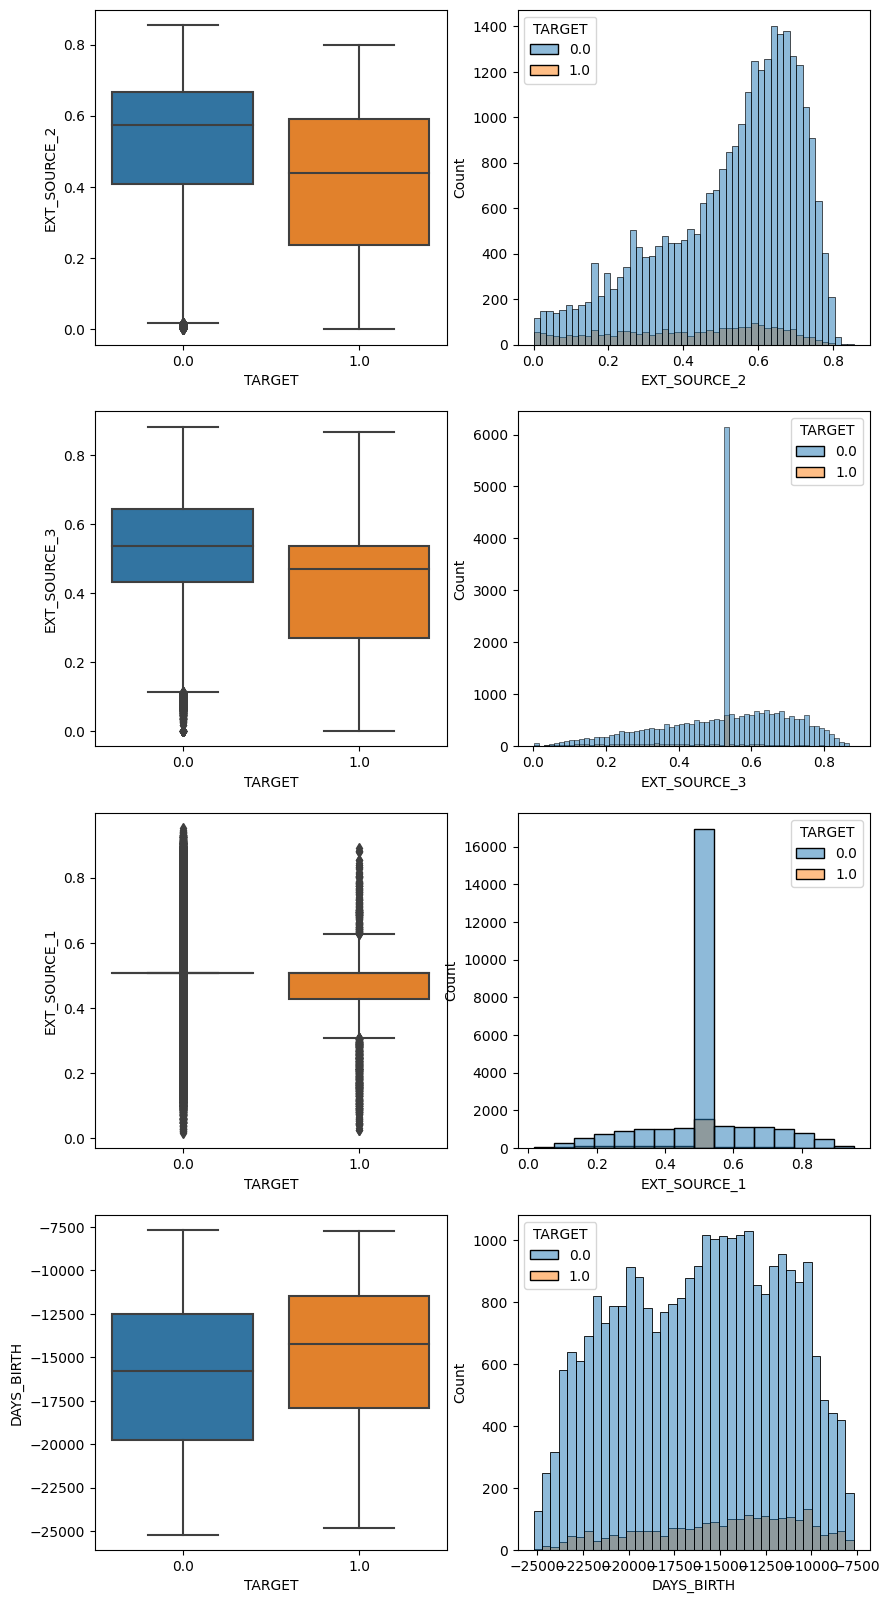

In [24]:
fig, axs = plt.subplots(figsize=(10, 20), nrows=4, ncols=2)

for i in range(4):
    sns.boxplot(y=X[corr_features[i]],
                x=y,
                ax=axs[i][0])
    sns.histplot(x=X[corr_features[i]],
                hue=y,
                ax=axs[i][1])

Pirson correlation can find linear dependence between feature and its target. But if dependence in non-linear, Pirson correlation can't find it. And it's very big disadvantage of the approach.

That's why sometimes it's not a bad idea to try to transform your features into its square root. Sometimes it can help to find implicit non-linear dependencies with even Pirson correlation.

## T-score

This method uses in problems of binary classification (for multiclass classification uses F-score).

$$R(x, y) = \dfrac{|\mu_1 - \mu_0|}{\sqrt{\dfrac{\sigma_{0}^2}{n_0} + \dfrac{\sigma_{1}^2}{n_1}}}$$

where
$\mu_i$, $\sigma_{i}^2$, $n_i$ - average, dispersion and number of objects for feature $x$ of class $i$, $i \in [0, 1]$

In [25]:
def t_score(x, y):
  def calc_stats(x):
    return np.mean(x), np.var(x), len(x)

  mu0, s0, n0 = calc_stats(x[y == 0.0])
  mu1, s1, n1 = calc_stats(x[y == 1.0])
  return np.abs(mu1-mu0) / np.sqrt(s0/n0 + s1/n1)

In [26]:
tscore_features = feature_selector(X, y, score_function=t_score)
print(str(len(tscore_features)), 'selected features')

100 selected features


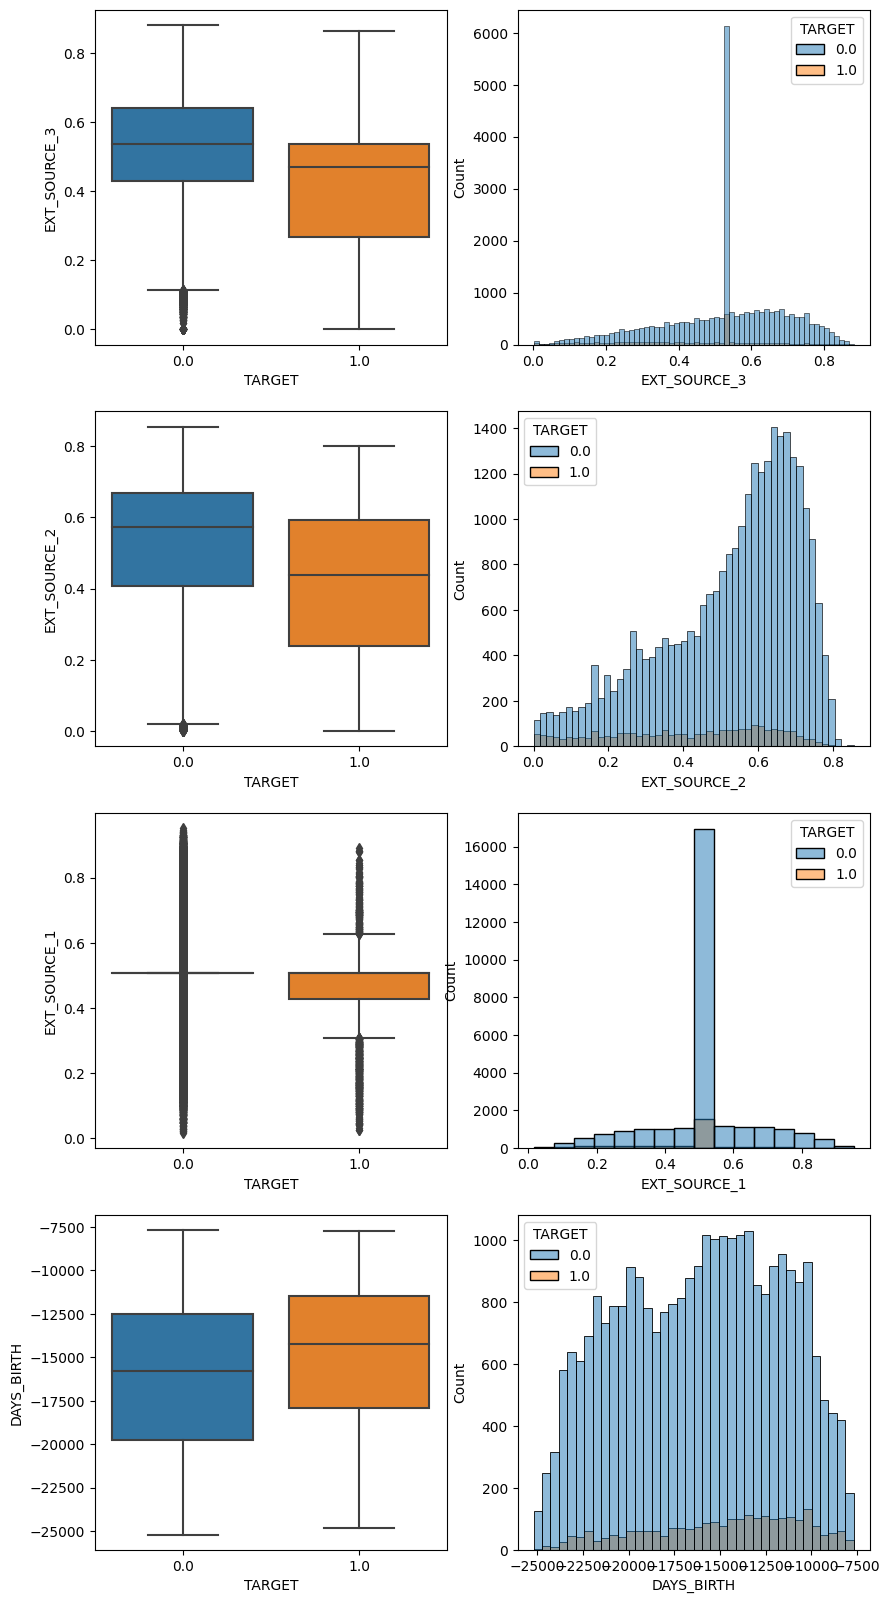

In [27]:
fig, axs = plt.subplots(figsize=(10,20), nrows=4, ncols=2)

for i in range(4):
  sns.boxplot(y=X[tscore_features[i]],
               x=y,
               ax=axs[i][0])
  sns.histplot(x=X[tscore_features[i]],
               hue=y,
               ax=axs[i][1])

Compare features selected by different methods.

In [28]:
set(corr_features) == set(tscore_features)

False

The main disadvantage of one-dimentional methods - they don't work if the target variable depends on set of characteristics

# Wrappers

The main idea: Evaluate subsets of features, making it possible to detect possible relationships between a set of features

RFE (Recursive Feature Elimination) - is trained on an initial set of features, and the importance of each feature is obtained either through the `coef_` attribute or through the `feature_importances_ attribute` of the model specified in the `estimator`.

Then `step` the least important features are removed. This procedure is repeated recursively until `n_features_to_select` features are eventually reached.

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [30]:
X_norm = StandardScaler().fit_transform(X)
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=100, step=10, verbose=5)
rfe_selector.fit(X_norm, y)

Fitting estimator with 224 features.
Fitting estimator with 214 features.
Fitting estimator with 204 features.
Fitting estimator with 194 features.
Fitting estimator with 184 features.
Fitting estimator with 174 features.
Fitting estimator with 164 features.
Fitting estimator with 154 features.
Fitting estimator with 144 features.
Fitting estimator with 134 features.
Fitting estimator with 124 features.
Fitting estimator with 114 features.
Fitting estimator with 104 features.


RFE(estimator=LogisticRegression(), n_features_to_select=100, step=10,
    verbose=5)

In [31]:
rfe_support = rfe_selector.get_support() #Получаем маску True/False для признаков
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

100 selected features


The main disadvantage of this approach - high calculational time costs.

# Embeded methods

## SelectFromModel

The main idea of ​​`SelectFromModel`: the importance of features is calculated through the `estimator`. If the importance is less than the threshold value, the feature is removed. The threshold value is set by the `threshold` parameter - you can set it as a number or specify a heuristic: “mean”, “median”, you can additionally add a fraction $0.1*mean$.

In [32]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

In [33]:
embeded_lr_selector = SelectFromModel(estimator=LogisticRegression(penalty="l2"), threshold='1.25*median')
embeded_lr_selector.fit(X_norm, y)
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

98 selected features


## Random forest

it has the attribute `feature_importances_` - the importance of a feature is calculated as the normalized sum of decreases in the criterion across all trees, across all vertices where there was a partition based on this feature

In [34]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X, y)

plot = sns.barplot(y=feature_name,
                   x=clf.feature_importances_,
                   order=np.array(feature_name)[np.argsort(clf.feature_importances_)][::-1]
                   )
plot.figure.set_size_inches(10, 50)

Apply `SelectFromModel` to `RandomForestClassifier`

In [35]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [36]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100),
                                      threshold='1.25*median')
embeded_rf_selector.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(), threshold='1.25*median')

In [37]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

92 selected features


## LGBMClassifier

`SelectFromModel` can be used not only with models from `sklearn`. For instance, you can use `LGBMClassifier` (it also has `feature_importances_`)

In [38]:
!pip install lightgbm

In [39]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier
import re

In [40]:
X_renamed = X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

lgbc=LGBMClassifier(n_estimators=500,
                    learning_rate=0.05,
                    num_leaves=32,
                    colsample_bytree=0.2,
                    reg_alpha=3,
                    reg_lambda=1,
                    min_split_gain=0.01,
                    min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, threshold='1.25*median')
embeded_lgb_selector.fit(X_renamed, y)

[LightGBM] [Info] Number of positive: 2482, number of negative: 28269
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10573
[LightGBM] [Info] Number of data points in the train set: 30751, number of used features: 207
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080713 -> initscore=-2.432701
[LightGBM] [Info] Start training from score -2.432701
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

SelectFromModel(estimator=LGBMClassifier(colsample_bytree=0.2,
                                         learning_rate=0.05,
                                         min_child_weight=40,
                                         min_split_gain=0.01, n_estimators=500,
                                         num_leaves=32, reg_alpha=3,
                                         reg_lambda=1),
                threshold='1.25*median')

In [41]:
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

108 selected features
